In [8]:
%matplotlib inline

In [6]:
#from hyperseti import 
import pylab as plt
from hyperseti.hyperseti import  find_et_serial,  H5Reader, run_pipeline
import logbook
import hyperseti
hyperseti.logger_group.level = logbook.INFO
#hyperseti.peak.logger.level  = logbook.DEBUG

#find_et(fn, filename_out='hits.csv', n_parallel=1, gulp_size=2**12)

In [9]:
fn = '/datax/collate_mb/PKS_0262_2018-02-21T17:00/blc01/guppi_58171_08035_757812_G26.37-1.21_0001.0000.hires.hdf'
gulp_size = 2**20

h5 = H5Reader(fn, gulp_size=gulp_size) 
gulp_metadata = h5.generate_gulp_metadata()
md = next(gulp_metadata)

d = h5.read_data(md)

[2021-04-14 10:59:51.606759] INFO: hyperseti.hyperseti: ## Subband 1/44 read: 43.61ms ##


In [39]:
dedopp, metadata, hits = run_pipeline(d, h5.metadata, max_dd=1.0, apply_normalization=True, n_boxcar=1,
                                      min_ddistance=10, min_fdistance=50, threshold=5)

[2021-04-14 11:11:47.333322] INFO: hyperseti.hyperseti: Normalisation time: 0.57ms
[2021-04-14 11:11:47.337014] INFO: hyperseti.hyperseti: --- Boxcar size: 1 ---
[2021-04-14 11:11:47.338304] INFO: hyperseti.hyperseti: Dedopp setup time: 0.67ms
[2021-04-14 11:11:47.338866] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.10ms
[2021-04-14 11:11:48.139681] INFO: hyperseti.hyperseti: Peak find time: 800.07ms
[2021-04-14 11:11:48.140666] INFO: hyperseti.hyperseti: Peak find memcopy: 0.27ms
[2021-04-14 11:11:48.193002] INFO: hyperseti.hyperseti: Hit merging time: 49.10ms
[2021-04-14 11:11:48.194483] INFO: hyperseti.hyperseti: Pipeline runtime: 1.30s


In [41]:
fn = '/home/dancpr/blimpy/tests/test_data/Voyager1.single_coarse.fine_res.h5'
gulp_size = 2**20

h5 = H5Reader(fn, gulp_size=gulp_size) 
gulp_metadata = h5.generate_gulp_metadata()
md = next(gulp_metadata)

d = h5.read_data(md)

dedopp, metadata, hits = run_pipeline(d, h5.metadata, max_dd=1.0, apply_normalization=True, n_boxcar=4,
                                      min_ddistance=10, min_fdistance=50, threshold=3)

[2021-04-14 11:12:25.367121] INFO: hyperseti.hyperseti: ## Subband 1/1 read: 2616.62ms ##
[2021-04-14 11:12:25.862689] INFO: hyperseti.hyperseti: Normalisation time: 0.69ms
[2021-04-14 11:12:25.866579] INFO: hyperseti.hyperseti: --- Boxcar size: 1 ---
[2021-04-14 11:12:25.867974] INFO: hyperseti.hyperseti: Dedopp setup time: 0.73ms
[2021-04-14 11:12:25.868754] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.28ms
[2021-04-14 11:12:26.678059] INFO: hyperseti.hyperseti: Peak find time: 808.65ms
[2021-04-14 11:12:26.678786] INFO: hyperseti.hyperseti: Peak find memcopy: 0.27ms
[2021-04-14 11:12:26.681727] INFO: hyperseti.hyperseti: --- Boxcar size: 2 ---
[2021-04-14 11:12:26.682949] INFO: hyperseti.hyperseti: Filter time: 0.34ms
[2021-04-14 11:12:26.683579] INFO: hyperseti.hyperseti: Dedopp setup time: 1.36ms
[2021-04-14 11:12:26.684253] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.07ms
[2021-04-14 11:12:27.203144] INFO: hyperseti.hyperseti: Peak find time: 518.25ms
[2021-04-14 11:12:2

In [42]:
hits

,driftrate,f_start,snr,driftrate_idx,channel_idx,boxcar_size
0,0.009566,8419.921874,4093.418457,105.0,524288.0,1.0
35,0.401793,8419.921862,362.314087,146.0,524292.0,8.0
36,-0.564423,8419.921882,272.134552,45.0,524285.0,8.0
1,-0.459192,8419.921882,256.930725,56.0,524285.0,1.0
2,-0.736620,8419.921885,256.929291,27.0,524284.0,1.0
3,-0.248729,8419.921876,256.928314,78.0,524287.0,1.0
4,0.688787,8419.921862,256.927277,176.0,524292.0,1.0
7,-0.956649,8419.921890,256.907074,4.0,524282.0,1.0
8,0.975782,8419.921857,256.899231,206.0,524294.0,1.0
11,-0.822718,8419.921885,181.730331,18.0,524284.0,2.0


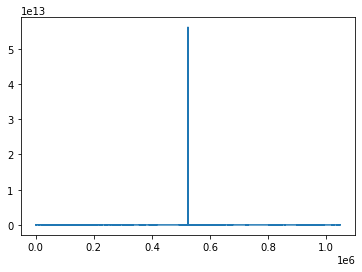

In [9]:
plt.plot(d.mean(axis=0))

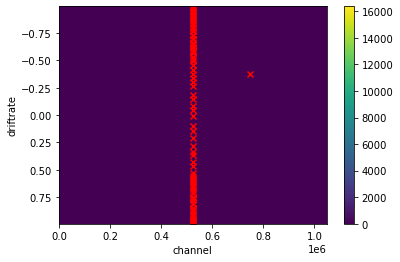

In [22]:
from hyperseti import plotting
plotting.imshow_dedopp(dedopp, h5.metadata)
plotting.overlay_hits(hits)

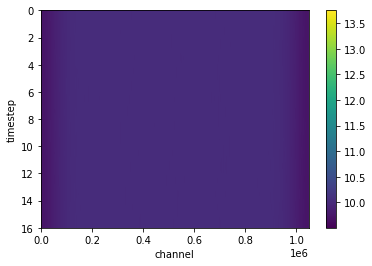

In [24]:
plotting.imshow_waterfall(np.log10(d), h5.metadata)

In [12]:
import pandas as pd
hits = pd.read_csv('hits_onebox.csv')

In [26]:
hits

,driftrate,f_start,snr,driftrate_idx,channel_idx,boxcar_size
0,0.009566,8419.921874,4093.418457,105.0,524288.0,1.0
27,0.401793,8419.921862,362.314087,146.0,524292.0,8.0
28,-0.564423,8419.921882,272.134552,45.0,524285.0,8.0
1,-0.459192,8419.921882,256.930725,56.0,524285.0,1.0
2,-0.736620,8419.921885,256.929291,27.0,524284.0,1.0
3,-0.248729,8419.921876,256.928314,78.0,524287.0,1.0
4,0.688787,8419.921862,256.927277,176.0,524292.0,1.0
7,-0.956649,8419.921890,256.907074,4.0,524282.0,1.0
8,0.975782,8419.921857,256.899231,206.0,524294.0,1.0
11,-0.822718,8419.921885,181.730331,18.0,524284.0,2.0


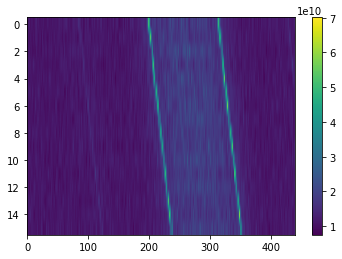

In [45]:
from astropy import units as u
import pylab as plt
h0 = hits.iloc[-1]

padding = 200
nchan_drift = h0['driftrate'] * u.Hz / u.s * metadata['dt'] * d.shape[0] / metadata['df']
i0 = int(h0['channel_idx'])
i1 = int(h0['channel_idx'] + nchan_drift)
if i0 < i1:
    pdata = d[:, i0-padding:i1+padding]
else:
    pdata = d[:, i1-padding:i0+padding]

plt.imshow(pdata, aspect='auto')
plt.colorbar()

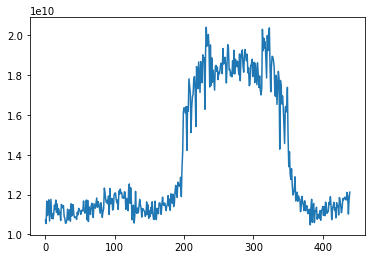

In [46]:
plt.plot(pdata.mean(axis=0))

In [8]:
%matplotlib inline

In [3]:
hits = find_et_serial(fn, filename_out='hits_1_20.csv', gulp_size=2**20, 
                      apply_normalization=True, n_boxcar=5, max_dd=1.0,
                      min_ddistance=20, min_fdistance=50, threshold=25)

hyperseti       INFO     ## Subband 1/44 read: 154.66ms ##
hyperseti       INFO     Normalisation time: 415.27ms
hyperseti       INFO     --- Boxcar size: 1 ---
hyperseti       INFO     Dedopp setup time: 2.31ms
hyperseti       INFO     Dedopp kernel time: 2.65ms
Maxfilter: 315.34 ms
bitbash: 249.98 ms
coord search: 37.74 ms
crazyloop: 53.58 ms
hyperseti       INFO     Peak find time: 657.71ms
hyperseti       INFO     Peak find memcopy: 0.15ms
hyperseti       INFO     --- Boxcar size: 2 ---
hyperseti       INFO     Filter time: 10.93ms
hyperseti       INFO     Dedopp setup time: 12.10ms
hyperseti       INFO     Dedopp kernel time: 0.10ms
Maxfilter: 0.28 ms
bitbash: 0.22 ms
coord search: 460.43 ms
crazyloop: 7.33 ms
hyperseti       INFO     Peak find time: 468.59ms
hyperseti       INFO     Peak find memcopy: 0.29ms
hyperseti       INFO     --- Boxcar size: 4 ---
hyperseti       INFO     Filter time: 3.14ms
hyperseti       INFO     Dedopp setup time: 4.71ms
hyperseti       INFO     Dedop

In [6]:
hits

,driftrate,f_start,snr,driftrate_idx,channel_idx,boxcar_size
0,0.011606,1512.000000,337.566864,87.0,524288.0,1.0
9,0.290138,1512.007427,85.573517,111.0,522063.0,4.0
7,-0.034817,1512.044180,66.975349,83.0,511052.0,2.0
3,0.441010,1511.999927,31.491243,124.0,524310.0,1.0
4,-0.847204,1512.000113,31.155291,13.0,524254.0,1.0
...,...,...,...,...,...,...
13,-0.023211,1513.497337,37.446499,84.0,44115888.0,8.0
0,0.011606,1510.499999,214.629364,87.0,46062446.0,1.0
1,-0.023211,1510.483490,55.340118,84.0,46067392.0,1.0
6,-0.023211,1510.497305,51.770092,84.0,46063253.0,2.0


In [10]:
%matplotlib inline

In [4]:
hits = find_et_serial(fn, filename_out='hits_onebox.csv', gulp_size=2**20, 
                      apply_normalization=True, n_boxcar=1, max_dd=1.0,
                      min_ddistance=20, min_fdistance=50, threshold=25)

hyperseti       INFO     ## Subband 1/44 read: 283.21ms ##
hyperseti       INFO     Normalisation time: 0.42ms
hyperseti       INFO     --- Boxcar size: 1 ---
hyperseti       INFO     Dedopp setup time: 0.57ms
hyperseti       INFO     Dedopp kernel time: 0.22ms
Maxfilter: 0.29 ms
bitbash: 0.27 ms
coord search: 739.85 ms
crazyloop: 9.50 ms
hyperseti       INFO     Peak find time: 750.13ms
hyperseti       INFO     Peak find memcopy: 0.30ms
hyperseti       INFO     Hit merging time: 27.39ms
hyperseti       INFO     Pipeline runtime: 0.86s
hyperseti       INFO     4 hits found
hyperseti       INFO     ## Subband 2/44 read: 330.11ms ##
hyperseti       INFO     Normalisation time: 0.50ms
hyperseti       INFO     --- Boxcar size: 1 ---
hyperseti       INFO     Dedopp setup time: 0.59ms
hyperseti       INFO     Dedopp kernel time: 0.09ms
Maxfilter: 0.25 ms
bitbash: 0.21 ms
coord search: 716.53 ms
crazyloop: 7.86 ms
hyperseti       INFO     Peak find time: 725.09ms
hyperseti       INFO     Peak

In [23]:
hits

,Unnamed: 0,driftrate,f_start,snr,driftrate_idx,channel_idx,boxcar_size,i0,i1,sidx
0,0,0.011606,1512.000000,337.566864,87.0,524288.0,1.0,0.0,1048576.0,0.0
1,1,-0.046422,1512.044183,65.961884,82.0,511051.0,1.0,0.0,1048576.0,0.0
2,2,0.232111,1512.007440,59.320801,106.0,522059.0,1.0,0.0,1048576.0,0.0
3,3,0.441010,1511.999927,31.491243,124.0,524310.0,1.0,0.0,1048576.0,0.0
4,0,0.034817,1510.166256,632.692749,89.0,1073665.0,1.0,1048576.0,2097152.0,1.0
...,...,...,...,...,...,...,...,...,...,...
744,2,-0.998076,1366.497394,62.092831,0.0,44115871.0,1.0,44040192.0,45088768.0,42.0
745,0,0.011606,1359.999999,214.629364,87.0,46062446.0,1.0,45088768.0,46137344.0,43.0
746,1,-0.023211,1359.983490,55.340118,84.0,46067392.0,1.0,45088768.0,46137344.0,43.0
747,2,-0.023211,1359.997309,41.714291,84.0,46063252.0,1.0,45088768.0,46137344.0,43.0


In [12]:
from astropy import units as u
import pylab as plt
import h5py
import numpy as np

metadata = h5.metadata

hitlist = hits.sort_values('snr', ascending=False)
h5f = h5py.File(fn)

def imshow_hit(h5f, metadata, hitlist, hit_id, padding=100):
    """ Plot hit """
    h0 = hitlist.iloc[hit_id]
    
    nchan_drift = h0['driftrate'] * u.Hz / u.s * metadata['dt'] * h5f['data'].shape[0] / metadata['df']
    i0 = int(h0['channel_idx'] - padding)
    i1 = int(h0['channel_idx'] + nchan_drift + padding)
    
    f0 = (metadata['df'] * -1*(i0 - i1) / 2).value 
    f1 = (metadata['df'] * (i0 - i1) / 2).value 

    if i0 < i1:
        pdata = h5f['data'][:, 0, i0:i1]
    else:
        pdata = h5f['data'][:, 0, i1:i0]
    
    plt.figure(figsize=(8,6))
    plt.title(f"f0: {h0['f_start']:2.5f} MHz dr: {h0['driftrate']} Hz/s")
    plt.imshow(np.log10(pdata)*10, aspect='auto',
              extent=(f0, f1, 1, 0))
    plt.colorbar()

imshow_hit(h5f, metadata, hits.sort_values('snr'), hit_id=700, padding=100)

IndexError: single positional indexer is out-of-bounds

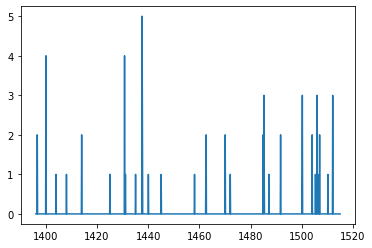

In [93]:
f_bins = np.linspace(1396, 1515, 1024)
plt.plot(f_bins[1:], np.histogram(hits['f_start'], bins=f_bins)[0])

In [8]:
gulp_metadata = list(h5.read_data_plan())

In [10]:
gulp_metadata[89]

{'fch1': <Quantity 1358. MHz>,
 'dt': <Quantity 19.17396114 s>,
 'df': <Quantity -3.33786011 Hz>,
 'drift_trials': array([-0.9980757 , -0.98647016, -0.97486463, -0.9632591 , -0.95165357,
        -0.94004804, -0.92844251, -0.91683698, -0.90523145, -0.89362591,
        -0.88202038, -0.87041485, -0.85880932, -0.84720379, -0.83559826,
        -0.82399273, -0.81238719, -0.80078166, -0.78917613, -0.7775706 ,
        -0.76596507, -0.75435954, -0.74275401, -0.73114848, -0.71954294,
        -0.70793741, -0.69633188, -0.68472635, -0.67312082, -0.66151529,
        -0.64990976, -0.63830422, -0.62669869, -0.61509316, -0.60348763,
        -0.5918821 , -0.58027657, -0.56867104, -0.5570655 , -0.54545997,
        -0.53385444, -0.52224891, -0.51064338, -0.49903785, -0.48743232,
        -0.47582679, -0.46422125, -0.45261572, -0.44101019, -0.42940466,
        -0.41779913, -0.4061936 , -0.39458807, -0.38298253, -0.371377  ,
        -0.35977147, -0.34816594, -0.33656041, -0.32495488, -0.31334935,
        -0

In [11]:
d = h5.read_data(gulp_metadata[89])

hyperseti       INFO     ## Subband 90/2816 read: 2.53ms ##


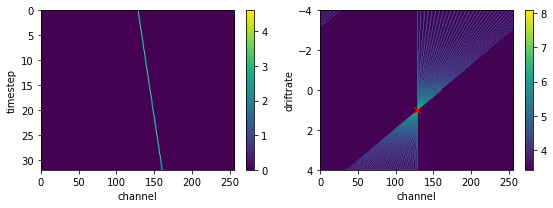

In [33]:
import numpy as np
import astropy.units as u
import pylab as plt
from hyperseti import dedoppler
from plotting import imshow_dedopp, imshow_waterfall, overlay_hits

# Create a drifting test signal
N_timestep, N_chans = 32, 256
test_data = np.ones(shape=(N_timestep, N_chans ))
for ii in range(N_timestep):
    test_data[ii, N_chans // 2 + ii] = 100

# Create basic metadata
metadata = {'fch1': 1000*u.MHz, 'dt': 1.0*u.s, 'df': 1.0*u.Hz}

# Run dedoppler
dedopp, metadata = dedoppler(test_data, metadata, boxcar_size=1, max_dd=4.0)

# Imshow output
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
imshow_waterfall(np.log(test_data), metadata)
plt.subplot(1,2,2)
imshow_dedopp(np.log(dedopp), metadata)
plt.tight_layout()

from hyperseti import hitsearch
hits = hitsearch(dedopp, metadata, threshold=500)

from plotting import overlay_hits
overlay_hits(hits)

plt.savefig("docs/figs/example2.png")

In [8]:
%matplotlib inline

In [34]:
hits

,driftrate,f_start,snr,driftrate_idx,channel_idx,boxcar_size
0,1.0,1000.000128,3200.0,160,128,1
